In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


# Dataset

In [4]:
data =pd.read_csv('eCommerce_dataset.csv')
data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fÃ© do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,parÃ¡ de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,para de minas,MG


In [347]:
data.shape

(152618, 38)

### Checking Null Values

In [348]:
print(data.isnull().sum().sort_values(ascending= False))

order_delivered_customer_date    3286
product_category_name_e          2210
product_name_lenght              2180
product_category_name            2180
product_photos_qty               2180
product_description_lenght       2180
order_delivered_carrier_date     1582
review_id                        1288
review_score                     1288
geolocation_state                 317
geolocation_city                  317
product_height_cm                  26
product_weight_g                   26
product_length_cm                  26
product_width_cm                   26
order_approved_at                  22
payment_value                       6
payment_installments                6
payment_sequential                  6
payment_type                        6
order_item_id                       0
order_id                            0
price                               0
shipping_limit_date                 0
seller_id                           0
product_id                          0
order_purcha

# Feature Selection

In [349]:
data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_e', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [350]:
# - Feature	                            Reason for Selection
#-----------------------------------------------------------------------------------------------
# - product_category_name_e	            Categorical encoding helps capture product hierarchy.
# - product_name_length	                Length of product name might affect shipping costs.
# - product_weight_g	                Weight directly affects shipping costs.
# - product_length_cm	                Product dimensions influence freight cost.
# - product_height_cm	                Larger items tend to cost more to ship.
# - product_width_cm	                Width adds to size-based cost.
# - price	                            High-priced products may need special shipping.
# - order_estimated_delivery_date	    Delivery estimates may vary shipping costs.
# - customer_state	                    Customer location impacts shipping distance.
# - seller_state	                    Seller location determines shipping distance.
# - review_score	                    Customer feedback might reflect delays/issues.
# - freight_value	                    High payment value could mean heavier orders.
#--------------
# - seller_zip_code_prefix 
# - seller_city, 
# - customer_zip_code_prefix, 
# - customer_city, 
# - shipping_limit_date

### New dataset with selected features

In [351]:
df = data[[ 'product_weight_g',
               'product_length_cm',
                 'product_height_cm',
                   'product_width_cm', 
                     'customer_state',
                      'seller_state',
                     'price',
                     'review_score',
                     'seller_zip_code_prefix',
                     
                     'customer_zip_code_prefix',
                     'freight_value'
                     
                    
                     ]]

In [377]:
# Rename price to product_price
df.rename(columns = {'price': 'product_price'})

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_state,seller_state,product_price,review_score,seller_zip_code_prefix,customer_zip_code_prefix,freight_value
0,650.0,28.0,9.0,14.0,RJ,SP,58.90,5.0,27277,28013,13.29
1,30000.0,50.0,30.0,40.0,SP,SP,239.90,4.0,3471,15775,19.93
2,30000.0,50.0,30.0,40.0,SP,SP,239.90,4.0,3471,15775,19.93
3,3050.0,33.0,13.0,33.0,MG,MG,199.00,5.0,37564,35661,17.87
4,3050.0,33.0,13.0,33.0,MG,MG,199.00,5.0,37564,35661,17.87
...,...,...,...,...,...,...,...,...,...,...,...
152613,10150.0,89.0,15.0,40.0,MA,SC,299.99,5.0,88303,65077,43.41
152614,8950.0,45.0,26.0,38.0,PR,SP,350.00,5.0,1206,81690,36.53
152615,967.0,21.0,24.0,19.0,SP,PR,99.90,5.0,80610,4039,16.95
152616,100.0,20.0,20.0,20.0,SP,SP,55.99,5.0,4733,13289,8.72


### Dataset Cleaning


In [353]:
# Duplicate Checking
df.duplicated().value_counts()

False    102164
True      50454
Name: count, dtype: int64

In [354]:
# Droping Duplicate and assigning to new dataframe
df1= df.drop_duplicates()

In [355]:
df1.duplicated().value_counts()

False    102164
Name: count, dtype: int64

### Cheaking nullvalues

In [356]:
print(df.isnull().sum().sort_values(ascending= False))

review_score                1288
product_length_cm             26
product_weight_g              26
product_height_cm             26
product_width_cm              26
seller_state                   0
customer_state                 0
price                          0
seller_zip_code_prefix         0
customer_zip_code_prefix       0
freight_value                  0
dtype: int64


In [357]:
# null Values removed
df1.dropna(inplace=True)

In [358]:
print(df1.isnull().sum().sort_values(ascending= False))

product_weight_g            0
product_length_cm           0
product_height_cm           0
product_width_cm            0
customer_state              0
seller_state                0
price                       0
review_score                0
seller_zip_code_prefix      0
customer_zip_code_prefix    0
freight_value               0
dtype: int64


### Outliers Identification

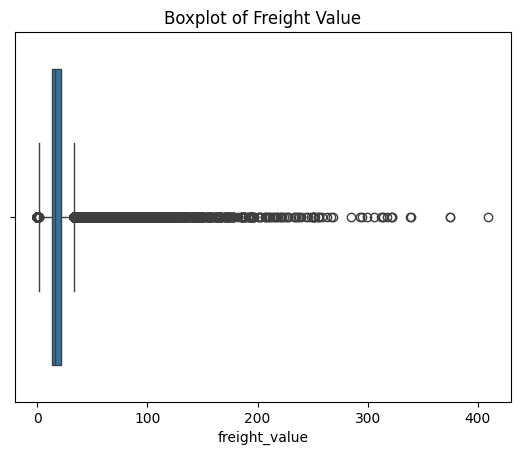

In [359]:
# Boxplot for freight_value , checking outliers
sns.boxplot(x=df1['freight_value'])
plt.title("Boxplot of Freight Value")
plt.show()

### Removing outliers using IQR method

In [360]:
Q1 = df1['freight_value'].quantile(0.25)
Q3 = df1['freight_value'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_clean = df1[(df1['freight_value'] >= lower_bound) & (df1['freight_value'] <= upper_bound)]
df_clean.head(10)

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_state,seller_state,price,review_score,seller_zip_code_prefix,customer_zip_code_prefix,freight_value
0,650.0,28.0,9.0,14.0,RJ,SP,58.90,5.0,27277,28013,13.29
1,30000.0,50.0,30.0,40.0,SP,SP,239.90,4.0,3471,15775,19.93
3,3050.0,33.0,13.0,33.0,MG,MG,199.00,5.0,37564,35661,17.87
5,200.0,16.0,10.0,15.0,SP,SP,12.99,4.0,14403,12952,12.79
6,3750.0,35.0,40.0,30.0,SP,PR,199.90,5.0,87900,13226,18.14
7,450.0,24.0,8.0,15.0,MG,SP,21.90,4.0,14091,38017,12.69
8,200.0,27.0,5.0,20.0,SP,SP,19.90,4.0,1026,16700,11.85
10,2000.0,30.0,12.0,16.0,SP,SP,145.95,1.0,3702,11075,11.65
11,850.0,29.0,3.0,21.0,SP,SP,53.99,4.0,2274,6636,11.40
12,950.0,35.0,25.0,20.0,SP,SP,59.99,5.0,9015,13419,8.88


In [361]:
df_clean.tail()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_state,seller_state,price,review_score,seller_zip_code_prefix,customer_zip_code_prefix,freight_value
152606,200.0,25.0,5.0,18.0,RJ,SC,17.90,5.0,88359,28540,22.06
152611,1050.0,16.0,20.0,16.0,MG,SP,119.85,5.0,13321,39401,20.03
152615,967.0,21.0,24.0,19.0,SP,PR,99.90,5.0,80610,4039,16.95
152616,100.0,20.0,20.0,20.0,SP,SP,55.99,5.0,4733,13289,8.72
152617,600.0,30.0,3.0,19.0,SP,SP,43.00,5.0,14940,18605,12.79


### Chart without outliers

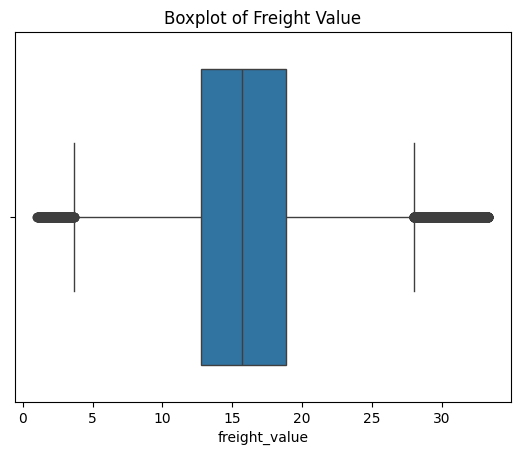

In [362]:
# Boxplot for freight_value
sns.boxplot(x=df_clean['freight_value'])
plt.title("Boxplot of Freight Value")
plt.show()

### one-hot encoding

In [363]:
df_clean = pd.get_dummies(df_clean, columns=['seller_state', 'customer_state'], drop_first=True)

In [364]:
df_clean

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,seller_zip_code_prefix,customer_zip_code_prefix,freight_value,seller_state_AM,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,650.0,28.0,9.0,14.0,58.90,5.0,27277,28013,13.29,False,...,False,True,False,False,False,False,False,False,False,False
1,30000.0,50.0,30.0,40.0,239.90,4.0,3471,15775,19.93,False,...,False,False,False,False,False,False,False,False,True,False
3,3050.0,33.0,13.0,33.0,199.00,5.0,37564,35661,17.87,False,...,False,False,False,False,False,False,False,False,False,False
5,200.0,16.0,10.0,15.0,12.99,4.0,14403,12952,12.79,False,...,False,False,False,False,False,False,False,False,True,False
6,3750.0,35.0,40.0,30.0,199.90,5.0,87900,13226,18.14,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152606,200.0,25.0,5.0,18.0,17.90,5.0,88359,28540,22.06,False,...,False,True,False,False,False,False,False,False,False,False
152611,1050.0,16.0,20.0,16.0,119.85,5.0,13321,39401,20.03,False,...,False,False,False,False,False,False,False,False,False,False
152615,967.0,21.0,24.0,19.0,99.90,5.0,80610,4039,16.95,False,...,False,False,False,False,False,False,False,False,True,False
152616,100.0,20.0,20.0,20.0,55.99,5.0,4733,13289,8.72,False,...,False,False,False,False,False,False,False,False,True,False


# Model Buildiing

### Independent (target) and Dependent Features 

In [365]:
# Separate features (X) and target variable (y)
X = df_clean.drop(columns=['freight_value'])  # Independent variables
y = df_clean['freight_value']  # Target variable

### Split into Train & Test(.2)

In [366]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

### RandomForestRegressor

In [367]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = round(mean_absolute_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred),2)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 1.76
R² Score: 0.73


In [368]:
# Random RandomForestRegressor

# # Mean Absolute Error (MAE): 1.76
# # R² Score: 0.73

# df = data[[ 'product_weight_g',
#                'product_length_cm',
#                  'product_height_cm',
#                    'product_width_cm', 
#                      'customer_state',
#                       'seller_state',
#                     'price',
#                      'review_score',
                     
#                      'seller_zip_code_prefix',
                     
#                      'customer_zip_code_prefix',
#                      'freight_value'
                     
                    
#                      ]]

### LinearRegression with PolynomialFeatures Trasform 

In [369]:
# poly = PolynomialFeatures(degree=2)

# # Transform the features into polynomial features
# X_poly_train = poly.fit_transform(X_train)
# X_poly_test = poly.transform(X_test)

# # Create a Linear Regression model
# model = LinearRegression()

# # Fit the model to the transformed features
# model.fit(X_poly_train, y_train)

# # Predict on test data
# y_pred = model.predict(X_poly_test)

# # Calculate the R² score and Mean Squared Error
# r2 = round(r2_score(y_test, y_pred),2)
# mse = round(mean_squared_error(y_test, y_pred),2)

# print(f"R² Score: {r2}")
# print(f"Mean Squared Error: {mse}")

#### Sample of feature used with polyfeature

In [371]:
# poly = PolynomialFeatures(degree=2)

# df = data[[ 'product_weight_g',
#                'product_length_cm',
#                  'product_height_cm',
#                    'product_width_cm', 
#                      'customer_state',
#                       'price',
#                      'seller_state',
#                      'review_score',
#                      'freight_value'
#                      ]]

# R² Score: 0.6192978325352929
# Mean Squared Error: 12.47445301898551

### LinerRegression Model

In [376]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R² Score:", round(r2, 4))
print("Mean Absolute Error (MAE):", round(mae, 2))

R² Score: 0.5255
Mean Absolute Error (MAE): 2.7


#### Sample Features for LinerRegression

In [ ]:
# LinearRegression
# R² Score: 0.5255
# Mean Absolute Error (MAE): 2.7

# df = data[[ 'product_weight_g',
#                'product_length_cm',
#                  'product_height_cm',
#                    'product_width_cm', 
#                      'customer_state',
#                       'seller_state',
#                     'price',
#                      'review_score',
                     
#                      'seller_zip_code_prefix',
                     
#                      'customer_zip_code_prefix',
#                      'freight_value'
                     
                    
#                      ]]


In [374]:
# LinearRegression
# df = data[[ 'product_weight_g',
#                'product_length_cm',
#                  'product_height_cm',
#                    'product_width_cm', 
#                      'customer_state',
#                       'price',
#                      'seller_state',
#                      'review_score',
#                      'freight_value',
#                      'seller_zip_code_prefix',
#                      'seller_city',
#                      'customer_zip_code_prefix',
#                      'customer_city'
#                      ]]

# R² Score: 0.5318
# Mean Absolute Error (MAE): 2.63